# Bank Customer Churn Prediction

# Part I Exploratory Data Analysis

**Contect**: It is the dataset of a U.S. bank customer for getting the information that , this particular customer will leave bank or not. This dataset is originated from a U.S. bank.


In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# drop unneccessary columns
df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], inplace=True)
print(df.shape)
df.head()

(10000, 11)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [52]:
df['Tenure'].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0])

## Cat vs Cat

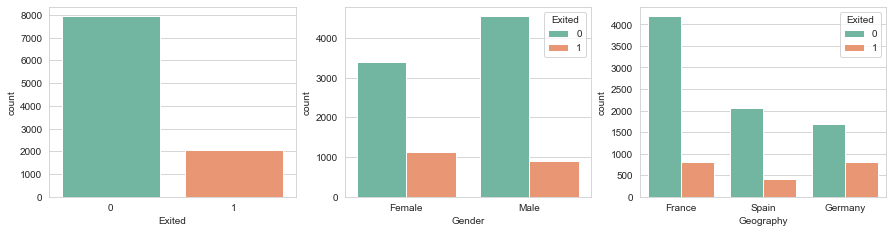

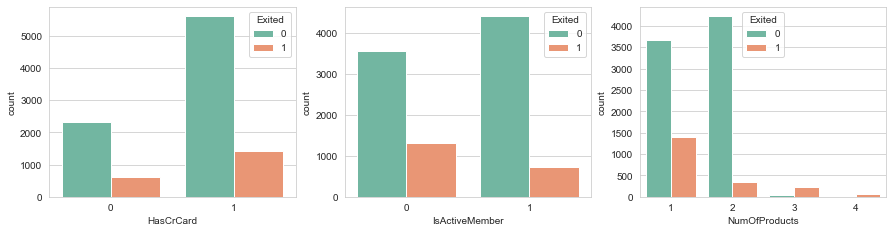

In [51]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(1,3, figsize = (15, 3.5))
ax1 = sns.countplot(data = df, x = "Exited", palette=sns.color_palette("Set2"), ax=axes[0])
ax2 = sns.countplot(data = df, x = "Gender", hue="Exited", palette=sns.color_palette("Set2"), ax=axes[1])
ax3 = sns.countplot(data = df, x = "Geography", hue="Exited", palette=sns.color_palette("Set2"), ax=axes[2])
fig, axes = plt.subplots(1,3, figsize = (15, 3.5))
ax4 = sns.countplot(data = df, x= "HasCrCard", hue="Exited", palette=sns.color_palette("Set2"), ax=axes[0])
ax5 = sns.countplot(data = df, x= "IsActiveMember", hue="Exited", palette=sns.color_palette("Set2"), ax=axes[1])
ax6 = sns.countplot(data = df, x= "NumOfProducts", hue="Exited", palette=sns.color_palette("Set2"), ax=axes[2])

## Cat vs Cont

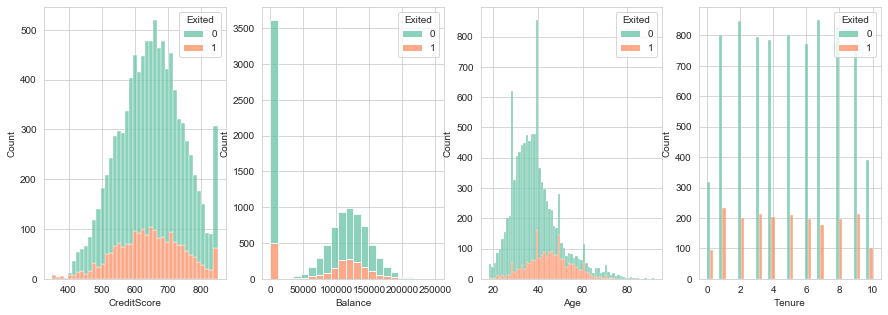

In [57]:
sns.set_palette("Set2",3)
f, ax = plt.subplots(1,4, figsize=(15,5))
ax1=sns.histplot(data = df, x='CreditScore', hue='Exited', multiple="stack", ax = ax[0])
ax2=sns.histplot(data = df, x='Balance', hue='Exited', multiple="stack", ax = ax[1])
ax3=sns.histplot(data = df, x='Age', hue='Exited', multiple="stack", ax = ax[2])
ax4=sns.histplot(data = df, x='Tenure', hue='Exited', multiple="dodge",ax = ax[3])

## Preprocessing

In [62]:
bank = df.copy()

In [63]:
bank['France'] = bank['Geography'].apply(lambda x:1 if x=='France' else 0)
bank['Germany'] = bank['Geography'].apply(lambda x:1 if x=='Germany' else 0)
bank['Spain'] = bank['Geography'].apply(lambda x:1 if x=='Spain' else 0)
bank['Gender_F'] = bank['Gender'].apply(lambda x:1 if x=='Female' else 0)
bank.drop(['Gender','Geography'], inplace=True, axis=1)
bank.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Gender_F
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1
